In [2]:
# Mount google drive (run this cell and allow permissions)
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [3]:
import sys    
path_to_module = '/content/gdrive/MyDrive/CPSC554X'
sys.path.append(path_to_module)

In [4]:
# !git clone https://github.com/ejconlon/biosignals.git '/content/gdrive/MyDrive/CPSC554X/biosignals'

In [5]:
! pip install -U pynwb
! pip install -U scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
# Boilerplate to chdir to project root and add projects sources to python path
import os
import sys

import keras
keras.utils.set_random_seed(42)

os.chdir('/content/gdrive/MyDrive/CPSC554X/biosignals')
sys.path.append(os.path.abspath('.'))

# Prepare the dataset
import biosignals.prepare as bp
if not bp.has_prepared('rand'):
    bp.prepare_rand()

import biosignals.deep_models as bdeep

Training model lstm-feature rand
Epoch 1/40
14/14 [==============================] - 11s 398ms/step - loss: 0.7499 - accuracy: 0.5056
Epoch 2/40
14/14 [==============================] - 6s 397ms/step - loss: 0.6967 - accuracy: 0.5609
Epoch 3/40
14/14 [==============================] - 6s 398ms/step - loss: 0.6536 - accuracy: 0.6190
Epoch 4/40
14/14 [==============================] - 6s 404ms/step - loss: 0.6376 - accuracy: 0.6341
Epoch 5/40
14/14 [==============================] - 6s 402ms/step - loss: 0.6234 - accuracy: 0.6408
Epoch 6/40
14/14 [==============================] - 6s 409ms/step - loss: 0.6190 - accuracy: 0.6765
Epoch 7/40
14/14 [==============================] - 6s 397ms/step - loss: 0.6005 - accuracy: 0.6821
Epoch 8/40
14/14 [==============================] - 6s 398ms/step - loss: 0.5950 - accuracy: 0.6855
Epoch 9/40
14/14 [==============================] - 6s 397ms/step - loss: 0.5880 - accuracy: 0.6855
Epoch 10/40
14/14 [==============================] - 6s 396ms/step

lstm-feature_rand train size: 1790
lstm-feature_rand train tn: 751
lstm-feature_rand train fp: 144
lstm-feature_rand train fn: 138
lstm-feature_rand train tp: 757
lstm-feature_rand train accuracy: 0.8424581005586592
lstm-feature_rand train precision: 0.8401775804661488
lstm-feature_rand train recall: 0.8458100558659218
lstm-feature_rand train f1: 0.8429844097995546
7/7 [==============================] - 0s 65ms/step
lstm-feature_rand test size: 198
lstm-feature_rand test tn: 66
lstm-feature_rand test fp: 33
lstm-feature_rand test fn: 37
lstm-feature_rand test tp: 62
lstm-feature_rand test accuracy: 0.6464646464646465
lstm-feature_rand test precision: 0.6526315789473685
lstm-feature_rand test recall: 0.6262626262626263
lstm-feature_rand test f1: 0.6391752577319588


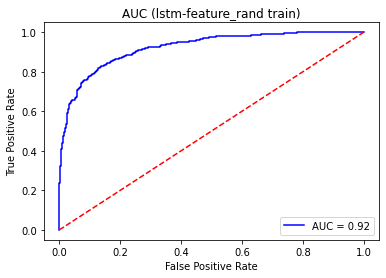

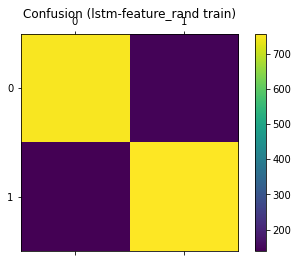

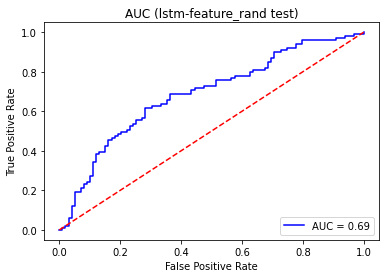

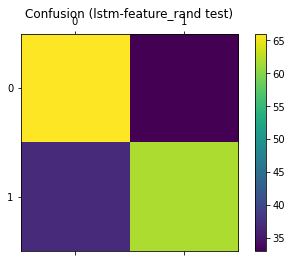

In [13]:
import biosignals.models as bm
from typing import Optional, List
from numpy.random import RandomState

def mk_lstm_feature_model():
    return bdeep.SequentialModel(bdeep.LSTMFeatureModel, {}, bdeep.FEAT_CONFIG, SEQ_CONFIG)
    
SEQ_CONFIG = bdeep.SequentialConfig(num_epochs=40, batch_size=128, verbose=True)

MODELS = []


# NOTE: When ready to test with holdouts, change list to bp.STANDARD_PREP_NAMES
for prep_name in ['rand']:
    MODELS.extend([
        bm.ModelCase('lstm-feature', prep_name, mk_lstm_feature_model),
    ])

# Test training with some deep learning models
def test_models(models: Optional[List[bm.ModelCase]] = None):
    if models is None:
        models = bdeep.MODELS
    bp.ensure_all()
    for case in models:
        print(f'Training model {case.model_name} {case.prep_name}')
        rand = RandomState(42)
        model = case.model_fn()
        model.execute(case.model_name, case.prep_name, rand)

test_models(MODELS)

Training model gru-feature rand
Epoch 1/50
14/14 [==============================] - 7s 315ms/step - loss: 0.7868 - accuracy: 0.5006
Epoch 2/50
14/14 [==============================] - 4s 319ms/step - loss: 0.6879 - accuracy: 0.5575
Epoch 3/50
14/14 [==============================] - 4s 321ms/step - loss: 0.6603 - accuracy: 0.6011
Epoch 4/50
14/14 [==============================] - 5s 330ms/step - loss: 0.9538 - accuracy: 0.5994
Epoch 5/50
14/14 [==============================] - 5s 323ms/step - loss: 0.6554 - accuracy: 0.5911
Epoch 6/50
14/14 [==============================] - 4s 320ms/step - loss: 0.6269 - accuracy: 0.6547
Epoch 7/50
14/14 [==============================] - 4s 319ms/step - loss: 0.6157 - accuracy: 0.6732
Epoch 8/50
14/14 [==============================] - 4s 317ms/step - loss: 0.6096 - accuracy: 0.6777
Epoch 9/50
14/14 [==============================] - 4s 315ms/step - loss: 0.6013 - accuracy: 0.6888
Epoch 10/50
14/14 [==============================] - 4s 313ms/step -

gru-feature_rand train size: 1790
gru-feature_rand train tn: 689
gru-feature_rand train fp: 206
gru-feature_rand train fn: 37
gru-feature_rand train tp: 858
gru-feature_rand train accuracy: 0.8642458100558659
gru-feature_rand train precision: 0.806390977443609
gru-feature_rand train recall: 0.958659217877095
gru-feature_rand train f1: 0.8759571209800918
7/7 [==============================] - 0s 60ms/step
gru-feature_rand test size: 198
gru-feature_rand test tn: 62
gru-feature_rand test fp: 37
gru-feature_rand test fn: 19
gru-feature_rand test tp: 80
gru-feature_rand test accuracy: 0.7171717171717171
gru-feature_rand test precision: 0.6837606837606838
gru-feature_rand test recall: 0.8080808080808081
gru-feature_rand test f1: 0.7407407407407407


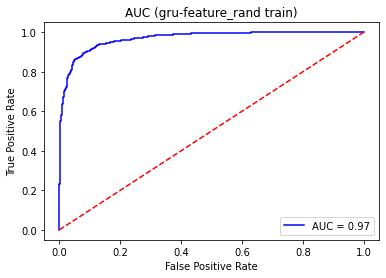

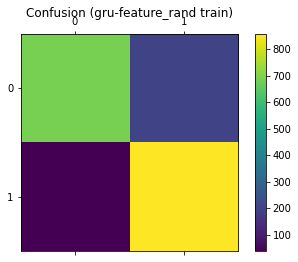

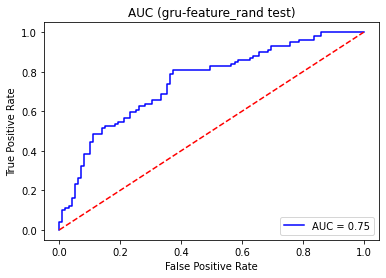

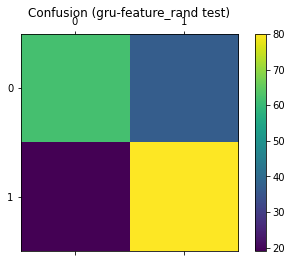

In [20]:
import tensorflow as tf
from keras.layers import Dense, LSTM, GRU, Activation, Conv1D, Flatten, Input  # Dropout, BatchNormalization
class GRUFeatureModel(tf.keras.Model):
    def __init__(self):
        super(GRUFeatureModel, self).__init__()
        self.gru1 = GRU(512, input_shape=(750, 32), return_sequences=True)
        self.activation = Activation("relu")
        self.gru2 = GRU(256)
        self.dense1 = Dense(128, activation='relu')
        self.dense2 = Dense(128, activation='relu')
        self.dense3 = Dense(1, activation='sigmoid')

    def call(self, inputs):
        [x, w] = inputs
        out1 = self.gru1(w)
        out1 = self.activation(out1)
        out1 = self.gru2(out1)
        out1 = self.dense1(out1)
        out2 = self.dense2(x)
        out = tf.keras.layers.Add()([out1, out2])
        return self.dense3(out)

def mk_gru_feature_model():
    return bdeep.SequentialModel(GRUFeatureModel, {}, FEAT_CONFIG, SEQ_CONFIG)

SEQ_CONFIG = bdeep.SequentialConfig(num_epochs=50, batch_size=128, verbose=True)
FEAT_CONFIG = bm.FeatureConfig(strategy=bm.Strategy.MULTI, use_pca=True, use_eeg=True)

MODELS = []


# NOTE: When ready to test with holdouts, change list to bp.STANDARD_PREP_NAMES
for prep_name in ['rand']:
    MODELS.extend([
        bm.ModelCase('gru-feature', prep_name, mk_gru_feature_model),
    ])

# Test training with some deep learning models
def test_models(models: Optional[List[bm.ModelCase]] = None):
    if models is None:
        models = bdeep.MODELS
    bp.ensure_all()
    for case in models:
        print(f'Training model {case.model_name} {case.prep_name}')
        rand = RandomState(42)
        model = case.model_fn()
        model.execute(case.model_name, case.prep_name, rand)

test_models(MODELS)        

Training model gru-feature rand
Epoch 1/40
14/14 [==============================] - 7s 309ms/step - loss: 0.7674 - accuracy: 0.5162
Epoch 2/40
14/14 [==============================] - 4s 314ms/step - loss: 0.6808 - accuracy: 0.5520
Epoch 3/40
14/14 [==============================] - 4s 319ms/step - loss: 0.6406 - accuracy: 0.6346
Epoch 4/40
14/14 [==============================] - 4s 317ms/step - loss: 0.6241 - accuracy: 0.6480
Epoch 5/40
14/14 [==============================] - 5s 323ms/step - loss: 0.5980 - accuracy: 0.6721
Epoch 6/40
14/14 [==============================] - 5s 322ms/step - loss: 0.5748 - accuracy: 0.7179
Epoch 7/40
14/14 [==============================] - 5s 322ms/step - loss: 0.5701 - accuracy: 0.7207
Epoch 8/40
14/14 [==============================] - 5s 324ms/step - loss: 0.5616 - accuracy: 0.7101
Epoch 9/40
14/14 [==============================] - 5s 326ms/step - loss: 0.5458 - accuracy: 0.7307
Epoch 10/40
14/14 [==============================] - 5s 324ms/step -

gru-feature_rand train size: 1790
gru-feature_rand train tn: 808
gru-feature_rand train fp: 87
gru-feature_rand train fn: 28
gru-feature_rand train tp: 867
gru-feature_rand train accuracy: 0.9357541899441341
gru-feature_rand train precision: 0.9088050314465409
gru-feature_rand train recall: 0.9687150837988827
gru-feature_rand train f1: 0.9378042184964847
7/7 [==============================] - 0s 60ms/step
gru-feature_rand test size: 198
gru-feature_rand test tn: 72
gru-feature_rand test fp: 27
gru-feature_rand test fn: 32
gru-feature_rand test tp: 67
gru-feature_rand test accuracy: 0.702020202020202
gru-feature_rand test precision: 0.7127659574468085
gru-feature_rand test recall: 0.6767676767676768
gru-feature_rand test f1: 0.694300518134715


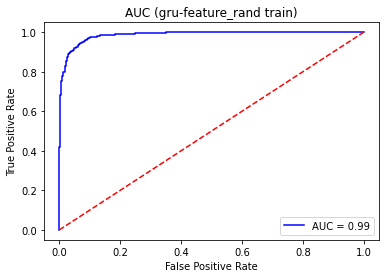

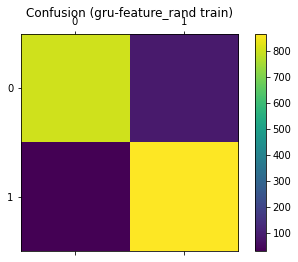

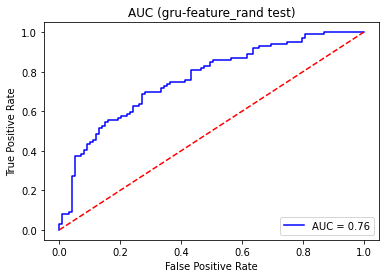

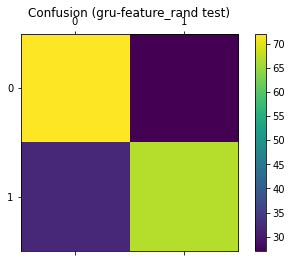

In [18]:
import tensorflow as tf
from keras.layers import Dense, LSTM, GRU, Activation, Conv1D, Flatten, Input  # Dropout, BatchNormalization
class GRUFeatureModel(tf.keras.Model):
    def __init__(self):
        super(GRUFeatureModel, self).__init__()
        self.gru1 = GRU(512, input_shape=(750, 32), return_sequences=True)
        self.activation = Activation("relu")
        self.gru2 = GRU(256)
        self.dense1 = Dense(128, activation='gelu')
        self.dense2 = Dense(128, activation='relu')
        self.dense3 = Dense(1, activation='sigmoid')

    def call(self, inputs):
        [x, w] = inputs
        out1 = self.gru1(w)
        out1 = self.activation(out1)
        out1 = self.gru2(out1)
        out1 = self.dense1(out1)
        out2 = self.dense2(x)
        out = tf.keras.layers.Add()([out1, out2])
        return self.dense3(out)

def mk_gru_feature_model():
    return bdeep.SequentialModel(GRUFeatureModel, {}, bdeep.FEAT_CONFIG, SEQ_CONFIG)

SEQ_CONFIG = bdeep.SequentialConfig(num_epochs=40, batch_size=128, verbose=True)

MODELS = []


# NOTE: When ready to test with holdouts, change list to bp.STANDARD_PREP_NAMES
for prep_name in ['rand']:
    MODELS.extend([
        bm.ModelCase('gru-feature', prep_name, mk_gru_feature_model),
    ])

# Test training with some deep learning models
def test_models(models: Optional[List[bm.ModelCase]] = None):
    if models is None:
        models = bdeep.MODELS
    bp.ensure_all()
    for case in models:
        print(f'Training model {case.model_name} {case.prep_name}')
        rand = RandomState(42)
        model = case.model_fn()
        model.execute(case.model_name, case.prep_name, rand)

test_models(MODELS)        

Training model gru-feature rand
Epoch 1/30
7/7 [==============================] - 7s 563ms/step - loss: 0.7526 - accuracy: 0.4972
Epoch 2/30
7/7 [==============================] - 4s 564ms/step - loss: 0.6899 - accuracy: 0.5408
Epoch 3/30
7/7 [==============================] - 4s 567ms/step - loss: 0.6674 - accuracy: 0.5726
Epoch 4/30
7/7 [==============================] - 4s 581ms/step - loss: 0.6406 - accuracy: 0.6223
Epoch 5/30
7/7 [==============================] - 4s 587ms/step - loss: 0.6244 - accuracy: 0.6469
Epoch 6/30
7/7 [==============================] - 4s 580ms/step - loss: 0.6168 - accuracy: 0.6520
Epoch 7/30
7/7 [==============================] - 4s 586ms/step - loss: 0.5999 - accuracy: 0.6872
Epoch 8/30
7/7 [==============================] - 4s 595ms/step - loss: 0.5856 - accuracy: 0.6883
Epoch 9/30
7/7 [==============================] - 4s 594ms/step - loss: 0.5704 - accuracy: 0.7050
Epoch 10/30
7/7 [==============================] - 4s 596ms/step - loss: 0.5614 - accu

gru-feature_rand train size: 1790
gru-feature_rand train tn: 816
gru-feature_rand train fp: 79
gru-feature_rand train fn: 166
gru-feature_rand train tp: 729
gru-feature_rand train accuracy: 0.8631284916201117
gru-feature_rand train precision: 0.9022277227722773
gru-feature_rand train recall: 0.8145251396648044
gru-feature_rand train f1: 0.8561362301820317
7/7 [==============================] - 0s 57ms/step
gru-feature_rand test size: 198
gru-feature_rand test tn: 80
gru-feature_rand test fp: 19
gru-feature_rand test fn: 48
gru-feature_rand test tp: 51
gru-feature_rand test accuracy: 0.6616161616161617
gru-feature_rand test precision: 0.7285714285714285
gru-feature_rand test recall: 0.5151515151515151
gru-feature_rand test f1: 0.603550295857988


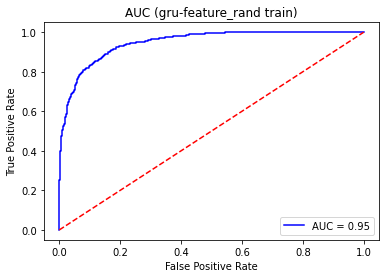

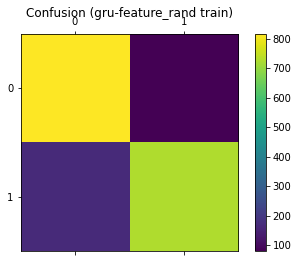

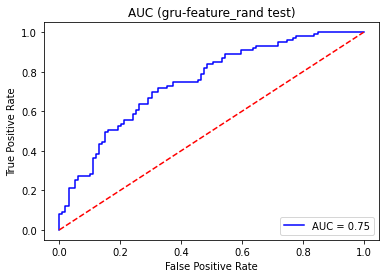

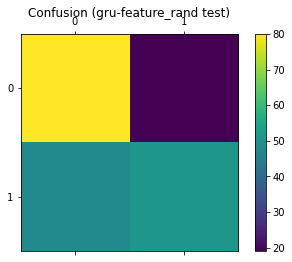

In [12]:
import tensorflow as tf
from keras.layers import Dense, LSTM, GRU, Activation, Conv1D, Flatten, Input  # Dropout, BatchNormalization
class GRUFeatureModel(tf.keras.Model):
    def __init__(self):
        super(GRUFeatureModel, self).__init__()
        self.gru1 = GRU(512, input_shape=(750, 32), return_sequences=True)
        self.activation = Activation("relu")
        self.gru2 = GRU(256)
        self.dense1 = Dense(128, activation='gelu')
        self.dense2 = Dense(128, activation='gelu')
        self.dense3 = Dense(1, activation='sigmoid')

    def call(self, inputs):
        [x, w] = inputs
        out1 = self.gru1(w)
        out1 = self.activation(out1)
        out1 = self.gru2(out1)
        out1 = self.dense1(out1)
        out2 = self.dense2(x)
        out = tf.keras.layers.Add()([out1, out2])
        return self.dense3(out)

def mk_gru_feature_model():
    return bdeep.SequentialModel(GRUFeatureModel, {}, bdeep.FEAT_CONFIG, SEQ_CONFIG)

SEQ_CONFIG = bdeep.SequentialConfig(num_epochs=30, batch_size=256, verbose=True)

MODELS = []


# NOTE: When ready to test with holdouts, change list to bp.STANDARD_PREP_NAMES
for prep_name in ['rand']:
    MODELS.extend([
        bm.ModelCase('gru-feature', prep_name, mk_gru_feature_model),
    ])

# Test training with some deep learning models
def test_models(models: Optional[List[bm.ModelCase]] = None):
    if models is None:
        models = bdeep.MODELS
    bp.ensure_all()
    for case in models:
        print(f'Training model {case.model_name} {case.prep_name}')
        rand = RandomState(42)
        model = case.model_fn()
        model.execute(case.model_name, case.prep_name, rand)

test_models(MODELS)        

Training model lstm-feature rand
Epoch 1/50
14/14 [==============================] - 9s 387ms/step - loss: 0.7199 - accuracy: 0.5274
Epoch 2/50
14/14 [==============================] - 5s 389ms/step - loss: 0.6800 - accuracy: 0.5788
Epoch 3/50
14/14 [==============================] - 5s 386ms/step - loss: 0.6430 - accuracy: 0.6257
Epoch 4/50
14/14 [==============================] - 5s 392ms/step - loss: 0.6275 - accuracy: 0.6419
Epoch 5/50
14/14 [==============================] - 6s 399ms/step - loss: 0.6175 - accuracy: 0.6559
Epoch 6/50
14/14 [==============================] - 6s 400ms/step - loss: 0.5985 - accuracy: 0.6832
Epoch 7/50
14/14 [==============================] - 6s 404ms/step - loss: 0.5840 - accuracy: 0.6888
Epoch 8/50
14/14 [==============================] - 6s 408ms/step - loss: 0.5721 - accuracy: 0.7168
Epoch 9/50
14/14 [==============================] - 6s 405ms/step - loss: 0.5579 - accuracy: 0.7251
Epoch 10/50
14/14 [==============================] - 6s 406ms/step 

lstm-feature_rand train size: 1790
lstm-feature_rand train tn: 843
lstm-feature_rand train fp: 52
lstm-feature_rand train fn: 68
lstm-feature_rand train tp: 827
lstm-feature_rand train accuracy: 0.9329608938547486
lstm-feature_rand train precision: 0.9408418657565415
lstm-feature_rand train recall: 0.924022346368715
lstm-feature_rand train f1: 0.9323562570462233
7/7 [==============================] - 0s 66ms/step
lstm-feature_rand test size: 198
lstm-feature_rand test tn: 76
lstm-feature_rand test fp: 23
lstm-feature_rand test fn: 41
lstm-feature_rand test tp: 58
lstm-feature_rand test accuracy: 0.6767676767676768
lstm-feature_rand test precision: 0.7160493827160493
lstm-feature_rand test recall: 0.5858585858585859
lstm-feature_rand test f1: 0.6444444444444445


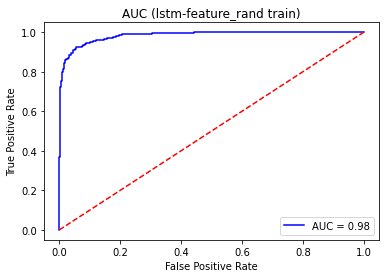

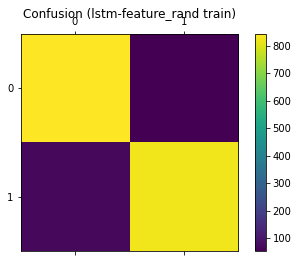

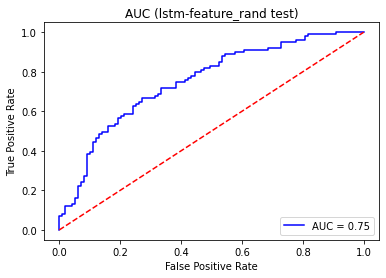

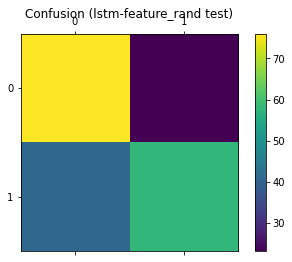

In [10]:
import biosignals.models as bm
from typing import Optional, List
from numpy.random import RandomState

def mk_lstm_feature_model():
    return bdeep.SequentialModel(bdeep.LSTMFeatureModel, {}, bdeep.FEAT_CONFIG, SEQ_CONFIG)
    
SEQ_CONFIG = bdeep.SequentialConfig(num_epochs=50, batch_size=128, verbose=True)

MODELS = []


# NOTE: When ready to test with holdouts, change list to bp.STANDARD_PREP_NAMES
for prep_name in ['rand']:
    MODELS.extend([
        bm.ModelCase('lstm-feature', prep_name, mk_lstm_feature_model),
    ])

# Test training with some deep learning models
def test_models(models: Optional[List[bm.ModelCase]] = None):
    if models is None:
        models = bdeep.MODELS
    bp.ensure_all()
    for case in models:
        print(f'Training model {case.model_name} {case.prep_name}')
        rand = RandomState(42)
        model = case.model_fn()
        model.execute(case.model_name, case.prep_name, rand)

test_models(MODELS)

In [ ]:
import os
import shutil
from dataclasses import dataclass, replace
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM, GRU, Activation  # Dropout, BatchNormalization
from typing import Any, Dict
import biosignals.models as bm
import biosignals.evaluation as be
from numpy.random import RandomState
import numpy as np
import biosignals.prepare as bp
import tensorflow as tf
from biosignals.deep_models import SequentialConfig, SequentialModel

def test_models():
    bp.ensure_rand()
    rand = RandomState(42)
    multi_config = bm.FeatureConfig(bm.Strategy.MULTI)
    multi_eeg_config = bm.FeatureConfig(strategy=bm.Strategy.MULTI, use_eeg=True)
    multi_pca_config = replace(multi_config, use_pca=True)
    seq_config = SequentialConfig(num_epochs=60, batch_size=128, verbose=True)

    # Create LSTM mode
    lstmModel = Sequential()
    lstmModel.add(LSTM(512, input_shape=(750, 32), return_sequences=True))
    lstmModel.add(Activation("relu"))
    lstmModel.add(LSTM(256))
    lstmModel.add(Dense(1, activation='sigmoid'))

    # Create GRU model
    gruModel = Sequential()
    gruModel.add(GRU(512, input_shape=(750, 32), return_sequences=True))
    gruModel.add(Activation("relu"))
    gruModel.add(GRU(256))
    gruModel.add(Dense(1, activation='sigmoid'))

    deepmodels = [
        ('lstm', lstmModel, {}, multi_eeg_config, seq_config),
        ('gru', gruModel, {}, multi_eeg_config, seq_config),
    ]
    os.makedirs('models', exist_ok=True)
    for name, klass, args, feat_config, seq_config in deepmodels:
        print(f'Training model {name} {klass} {args} {feat_config} {seq_config}')
        dest_dir = f'models/{name}'
        if os.path.exists(dest_dir):
            shutil.rmtree(dest_dir)
        os.makedirs(dest_dir)
        model = SequentialModel(klass, args, feat_config, seq_config)
        train_res, test_res = model.execute('rand', rand)
        be.eval_performance(name, 'train', train_res, dest_dir)
        be.eval_performance(name, 'test', test_res, dest_dir)
        be.plot_results(name, 'train', train_res, dest_dir)
        be.plot_results(name, 'test', test_res, dest_dir)

Training model lstm <keras.engine.sequential.Sequential object at 0x7f50a3233640> {} FeatureConfig(strategy=<Strategy.MULTI: 1>, use_pca=False, pca_components=64, use_eeg=True) SequentialConfig(num_epochs=60, batch_size=128, verbose=True)
(1594, 750, 32)
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 750, 512)          1116160   
                                                                 
 activation_6 (Activation)   (None, 750, 512)          0         
                                                                 
 lstm_7 (LSTM)               (None, 256)               787456    
                                                                 
 dense_6 (Dense)             (None, 1)                 257       
                                                                 
Total params: 1,903,873
Trainable params: 1,903,873
Non-trainab

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(1594, 750, 32)
Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_6 (GRU)                 (None, 750, 512)          838656    
                                                                 
 activation_7 (Activation)   (None, 750, 512)          0         
                                                                 
 gru_7 (GRU)                 (None, 256)               591360    
                                                                 
 dense_7 (Dense)             (None, 1)                 257       
                                                                 
Total params: 1,430,273
Trainable params: 1,430,273
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/60
13/13 [==============================] - 7s 297ms/step - loss: 0.6931 - accuracy: 0.5201
Epoch 2/60
13/13 [==============================] - 4s 

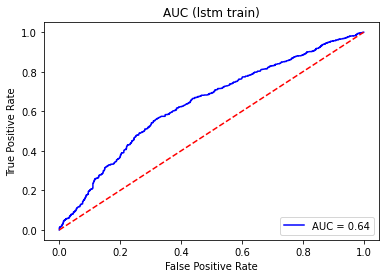

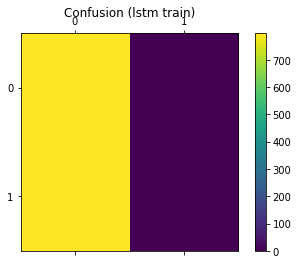

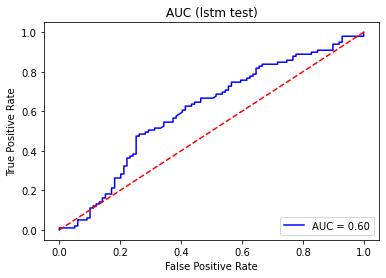

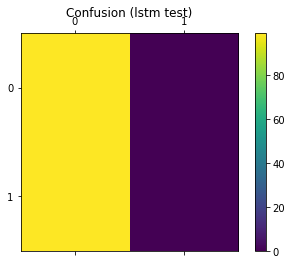

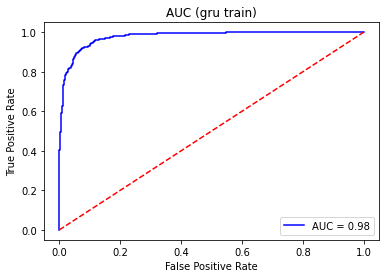

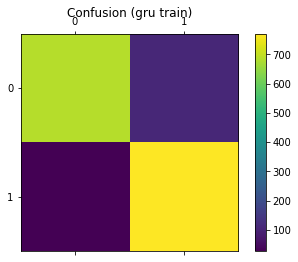

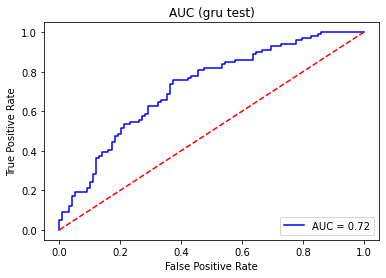

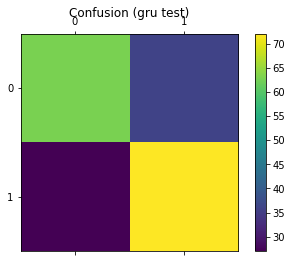

In [ ]:
test_models()

In [ ]:
import os
import shutil
from dataclasses import dataclass, replace
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM, GRU, Activation  # Dropout, BatchNormalization
from typing import Any, Dict
import biosignals.models as bm
import biosignals.evaluation as be
from numpy.random import RandomState
import numpy as np
import biosignals.prepare as bp
import tensorflow as tf
from biosignals.deep_models import SequentialConfig, SequentialModel

def test_models():
    bp.ensure_rand()
    rand = RandomState(42)
    multi_config = bm.FeatureConfig(bm.Strategy.MULTI)
    multi_eeg_config = bm.FeatureConfig(strategy=bm.Strategy.MULTI, use_eeg=True)
    multi_pca_config = replace(multi_config, use_pca=True)
    seq_config = SequentialConfig(num_epochs=60, batch_size=32, verbose=True)

    # Create LSTM mode
    lstmModel = Sequential()
    lstmModel.add(LSTM(512, input_shape=(750, 32), return_sequences=True))
    lstmModel.add(Activation("relu"))
    lstmModel.add(LSTM(256))
    lstmModel.add(Dense(1, activation='sigmoid'))

    # Create GRU model
    gruModel = Sequential()
    gruModel.add(GRU(512, input_shape=(750, 32), return_sequences=True))
    gruModel.add(Activation("relu"))
    gruModel.add(GRU(256))
    gruModel.add(Dense(1, activation='sigmoid'))

    deepmodels = [
        ('lstm', lstmModel, {}, multi_eeg_config, seq_config),
        ('gru', gruModel, {}, multi_eeg_config, seq_config),
    ]
    os.makedirs('models', exist_ok=True)
    for name, klass, args, feat_config, seq_config in deepmodels:
        print(f'Training model {name} {klass} {args} {feat_config} {seq_config}')
        dest_dir = f'models/{name}'
        if os.path.exists(dest_dir):
            shutil.rmtree(dest_dir)
        os.makedirs(dest_dir)
        model = SequentialModel(klass, args, feat_config, seq_config)
        train_res, test_res = model.execute('rand', rand)
        be.eval_performance(name, 'train', train_res, dest_dir)
        be.eval_performance(name, 'test', test_res, dest_dir)
        be.plot_results(name, 'train', train_res, dest_dir)
        be.plot_results(name, 'test', test_res, dest_dir)

Training model lstm <keras.engine.sequential.Sequential object at 0x7f508b99db50> {} FeatureConfig(strategy=<Strategy.MULTI: 1>, use_pca=False, pca_components=64, use_eeg=True) SequentialConfig(num_epochs=60, batch_size=32, verbose=True)
(1594, 750, 32)
Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 750, 512)          1116160   
                                                                 
 activation_8 (Activation)   (None, 750, 512)          0         
                                                                 
 lstm_9 (LSTM)               (None, 256)               787456    
                                                                 
 dense_8 (Dense)             (None, 1)                 257       
                                                                 
Total params: 1,903,873
Trainable params: 1,903,873
Non-trainabl

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(1594, 750, 32)
Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_8 (GRU)                 (None, 750, 512)          838656    
                                                                 
 activation_9 (Activation)   (None, 750, 512)          0         
                                                                 
 gru_9 (GRU)                 (None, 256)               591360    
                                                                 
 dense_9 (Dense)             (None, 1)                 257       
                                                                 
Total params: 1,430,273
Trainable params: 1,430,273
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/60
50/50 [==============================] - 9s 118ms/step - loss: 0.6924 - accuracy: 0.5144
Epoch 2/60
50/50 [==============================] - 6s 

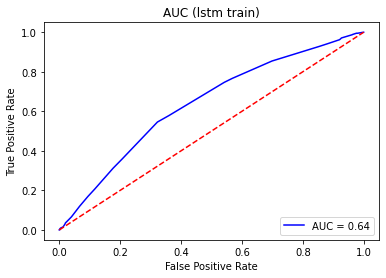

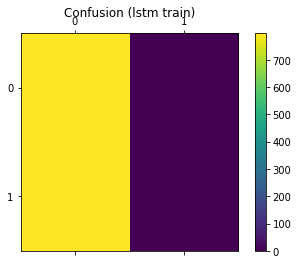

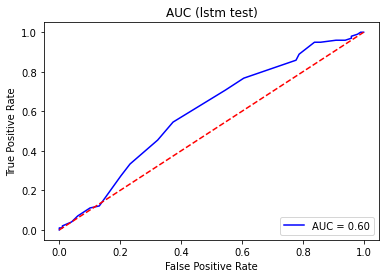

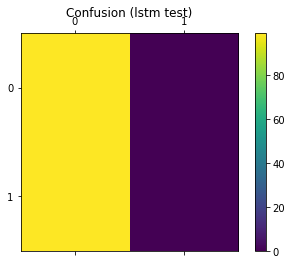

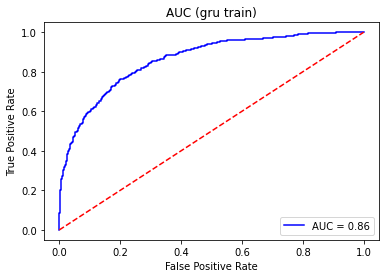

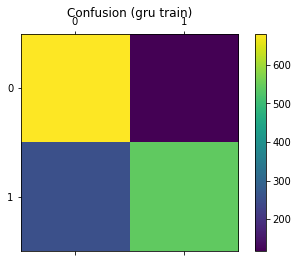

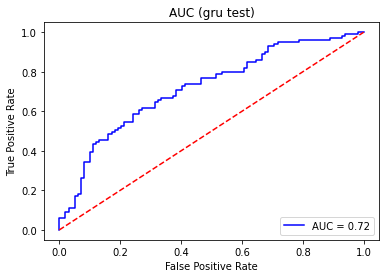

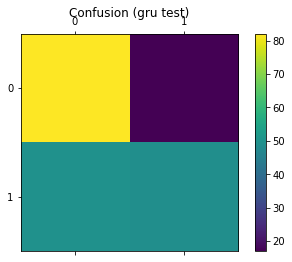

In [ ]:
test_models()

In [ ]:
import os
import shutil
from dataclasses import dataclass, replace
from keras.models import Sequential, Model
from keras.layers import Dense
from keras.layers import LSTM, GRU, Activation  # Dropout, BatchNormalization
from typing import Any, Dict
import biosignals.models as bm
import biosignals.evaluation as be
from numpy.random import RandomState
import numpy as np
import biosignals.prepare as bp
import tensorflow as tf
from biosignals.deep_models import SequentialConfig, SequentialModel

class SequentialModel(bm.FeatureModel):
    def __init__(
        self,
        model_class: Model,
        model_args: Dict[str, Any],
        feat_config: bm.FeatureConfig,
        seq_config: SequentialConfig
    ):
        super().__init__(feat_config)
        self._seq_config = seq_config
        self._model = model_class()

    # Takes x - normal features, w - eeg features, y - label
    def train_numpy(self, x: np.ndarray, w: np.ndarray, y_true: np.ndarray) -> be.Results:
        w_T = np.swapaxes(w, 1, 2)
        w_tf = tf.convert_to_tensor(w_T, dtype=tf.float64)
        x_tf = tf.convert_to_tensor(x, dtype=tf.float64)
        y_true_tf = tf.convert_to_tensor(y_true, dtype=tf.int32)
        model_inputs = [x_tf, w_tf]

        self._model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
        #if self._seq_config.verbose:
        #  print(self._model.summary())
        self._model.fit(
            [x_tf, w_tf],
            y_true_tf,
            epochs=self._seq_config.num_epochs,
            batch_size=self._seq_config.batch_size,
            verbose=self._seq_config.verbose
        )
        # Now predict
        y_pred_tf = self._model.predict([x_tf, w_tf])
        return be.Results(y_true=y_true, y_pred=y_pred_tf)

    # Takes x - normal features, w - eeg features, y - label
    def test_numpy(self, x: np.ndarray, w: np.ndarray, y_true: np.ndarray) -> be.Results:
        w_T = np.swapaxes(w, 1, 2)
        x_tf = tf.convert_to_tensor(x, dtype=tf.float64)
        w_tf = tf.convert_to_tensor(w_T, dtype=tf.float64)
        y_pred_tf = self._model.predict([x_tf, w_tf])
        return be.Results(y_true=y_true, y_pred=y_pred_tf)


class LSTMModel(tf.keras.Model):

  def __init__(self):
    super(LSTMModel, self).__init__()
    self.lstm1 = LSTM(512, input_shape=(750, 32), return_sequences=True)
    self.activation = Activation("relu")
    self.lstm2 = LSTM(256)
    self.dense1 = Dense(128, activation='relu')
    self.dense2 = Dense(128, activation='relu')
    self.dense3 = Dense(1, activation='sigmoid')

  def call(self, inputs):
    [x, w] = inputs
    out1 = self.lstm1(w)
    out1 = self.activation(out1)
    out1 = self.lstm2(out1)
    out1 = self.dense1(out1)
    out2 = self.dense2(x)
    out = tf.keras.layers.Add()([out1, out2])
    return self.dense3(out)


class GRUModel(tf.keras.Model):

  def __init__(self):
    super(GRUModel, self).__init__()
    self.gru1 = GRU(512, input_shape=(750, 32), return_sequences=True)
    self.activation = Activation("relu")
    self.gru2 = GRU(256)
    self.dense1 = Dense(128, activation='relu')
    self.dense2 = Dense(128, activation='relu')
    self.dense3 = Dense(1, activation='sigmoid')

  def call(self, inputs):
    [x, w] = inputs
    out1 = self.gru1(w)
    out1 = self.activation(out1)
    out1 = self.gru2(out1)
    out1 = self.dense1(out1)
    out2 = self.dense2(x)
    out = tf.keras.layers.Add()([out1, out2])
    return self.dense3(out)


# Test training with some deep learning models
def test_models():
    bp.ensure_rand()
    rand = RandomState(42)
    multi_config = bm.FeatureConfig(bm.Strategy.MULTI)
    multi_eeg_config = bm.FeatureConfig(strategy=bm.Strategy.MULTI, use_eeg=True)
    multi_pca_config = replace(multi_config, use_pca=True)
    seq_config = SequentialConfig(num_epochs=25, batch_size=32, verbose=True)


    deepmodels = [
        ('gru', LSTMModel, {}, multi_eeg_config, seq_config),
        ('lstm', LSTMModel, {}, multi_eeg_config, seq_config),
    ]
    os.makedirs('models', exist_ok=True)
    for name, klass, args, feat_config, seq_config in deepmodels:
        print(f'Training model {name} {klass} {args} {feat_config} {seq_config}')
        dest_dir = f'models/{name}'
        if os.path.exists(dest_dir):
            shutil.rmtree(dest_dir)
        os.makedirs(dest_dir)
        model = SequentialModel(klass, args, feat_config, seq_config)
        train_res, test_res = model.execute('rand', rand)
        be.eval_performance(name, 'train', train_res, dest_dir)
        be.eval_performance(name, 'test', test_res, dest_dir)
        be.plot_results(name, 'train', train_res, dest_dir)
        be.plot_results(name, 'test', test_res, dest_dir)

Training model gru <class '__main__.LSTMModel'> {} FeatureConfig(strategy=<Strategy.MULTI: 1>, use_pca=False, pca_components=64, use_eeg=True) SequentialConfig(num_epochs=25, batch_size=32, verbose=True)
Epoch 1/25
50/50 [==============================] - 10s 142ms/step - loss: 0.7407 - accuracy: 0.5088
Epoch 2/25
50/50 [==============================] - 7s 142ms/step - loss: 0.6629 - accuracy: 0.6016
Epoch 3/25
50/50 [==============================] - 7s 142ms/step - loss: 0.6394 - accuracy: 0.6311
Epoch 4/25
50/50 [==============================] - 7s 144ms/step - loss: 0.6246 - accuracy: 0.6355
Epoch 5/25
50/50 [==============================] - 7s 146ms/step - loss: 0.5945 - accuracy: 0.6807
Epoch 6/25
50/50 [==============================] - 7s 143ms/step - loss: 0.5898 - accuracy: 0.6744
Epoch 7/25
50/50 [==============================] - 7s 142ms/step - loss: 0.5819 - accuracy: 0.6976
Epoch 8/25
50/50 [==============================] - 7s 146ms/step - loss: 0.5757 - accuracy: 0.

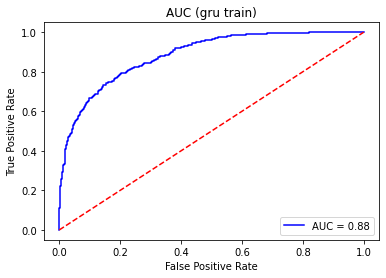

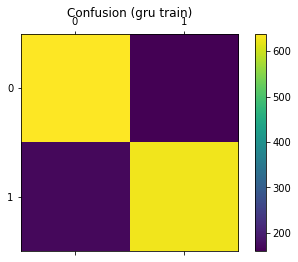

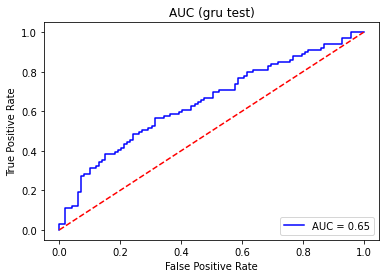

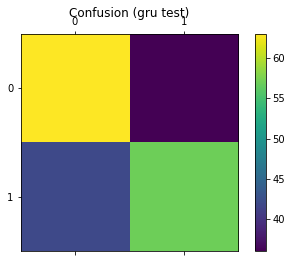

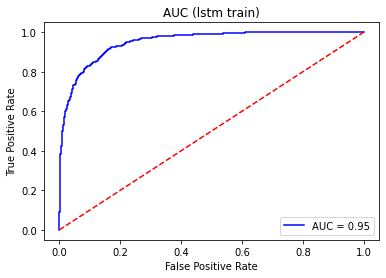

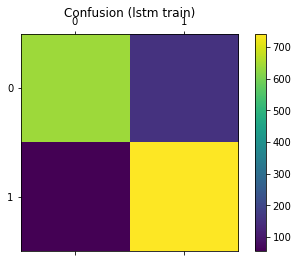

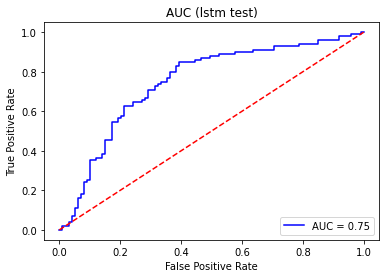

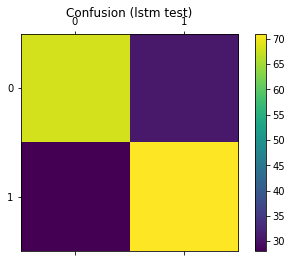

In [ ]:
test_models()

Training model gru <class '__main__.LSTMModel'> {} FeatureConfig(strategy=<Strategy.MULTI: 1>, use_pca=False, pca_components=64, use_eeg=True) SequentialConfig(num_epochs=50, batch_size=16, verbose=True)
Epoch 1/50
100/100 [==============================] - 14s 110ms/step - loss: 0.7517 - accuracy: 0.5169
Epoch 2/50
100/100 [==============================] - 11s 111ms/step - loss: 0.6705 - accuracy: 0.6010
Epoch 3/50
100/100 [==============================] - 11s 113ms/step - loss: 0.6556 - accuracy: 0.6142
Epoch 4/50
100/100 [==============================] - 11s 112ms/step - loss: 0.6328 - accuracy: 0.6380
Epoch 5/50
100/100 [==============================] - 11s 110ms/step - loss: 0.6063 - accuracy: 0.6518
Epoch 6/50
100/100 [==============================] - 11s 110ms/step - loss: 0.5963 - accuracy: 0.6644
Epoch 7/50
100/100 [==============================] - 11s 110ms/step - loss: 0.5771 - accuracy: 0.7139
Epoch 8/50
100/100 [==============================] - 11s 110ms/step - loss

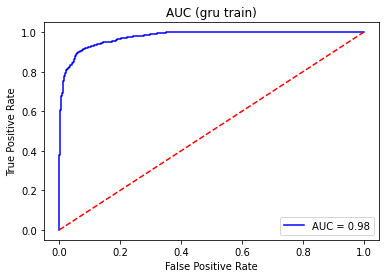

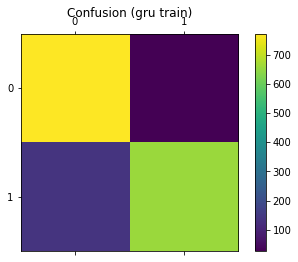

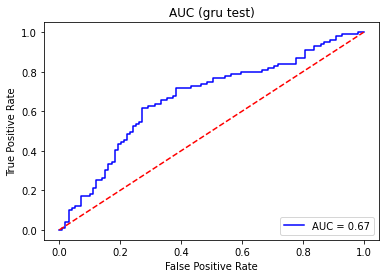

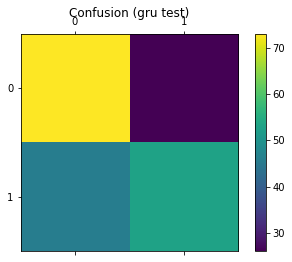

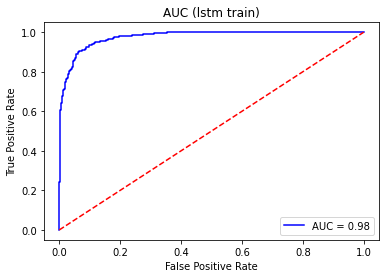

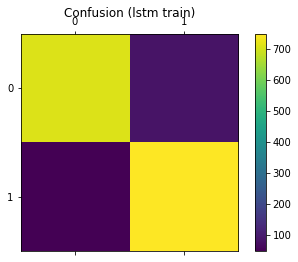

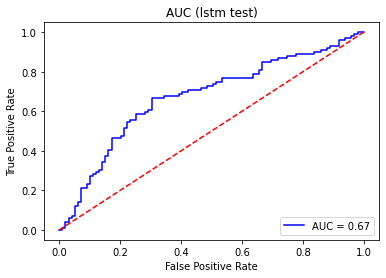

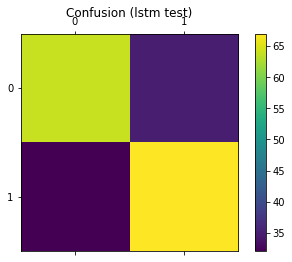

In [ ]:
import os
import shutil
from dataclasses import dataclass, replace
from keras.models import Sequential, Model
from keras.layers import Dense
from keras.layers import LSTM, GRU, Activation  # Dropout, BatchNormalization
from typing import Any, Dict
import biosignals.models as bm
import biosignals.evaluation as be
from numpy.random import RandomState
import numpy as np
import biosignals.prepare as bp
import tensorflow as tf
from biosignals.deep_models import SequentialConfig, SequentialModel

class SequentialModel(bm.FeatureModel):
    def __init__(
        self,
        model_class: Model,
        model_args: Dict[str, Any],
        feat_config: bm.FeatureConfig,
        seq_config: SequentialConfig
    ):
        super().__init__(feat_config)
        self._seq_config = seq_config
        self._model = model_class()

    # Takes x - normal features, w - eeg features, y - label
    def train_numpy(self, x: np.ndarray, w: np.ndarray, y_true: np.ndarray) -> be.Results:
        w_T = np.swapaxes(w, 1, 2)
        w_tf = tf.convert_to_tensor(w_T, dtype=tf.float64)
        x_tf = tf.convert_to_tensor(x, dtype=tf.float64)
        y_true_tf = tf.convert_to_tensor(y_true, dtype=tf.int32)
        model_inputs = [x_tf, w_tf]

        self._model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
        #if self._seq_config.verbose:
        #  print(self._model.summary())
        self._model.fit(
            [x_tf, w_tf],
            y_true_tf,
            epochs=self._seq_config.num_epochs,
            batch_size=self._seq_config.batch_size,
            verbose=self._seq_config.verbose
        )
        # Now predict
        y_pred_tf = self._model.predict([x_tf, w_tf])
        return be.Results(y_true=y_true, y_pred=y_pred_tf)

    # Takes x - normal features, w - eeg features, y - label
    def test_numpy(self, x: np.ndarray, w: np.ndarray, y_true: np.ndarray) -> be.Results:
        w_T = np.swapaxes(w, 1, 2)
        x_tf = tf.convert_to_tensor(x, dtype=tf.float64)
        w_tf = tf.convert_to_tensor(w_T, dtype=tf.float64)
        y_pred_tf = self._model.predict([x_tf, w_tf])
        return be.Results(y_true=y_true, y_pred=y_pred_tf)


class LSTMModel(tf.keras.Model):

  def __init__(self):
    super(LSTMModel, self).__init__()
    self.lstm1 = LSTM(512, input_shape=(750, 32), return_sequences=True)
    self.activation = Activation("relu")
    self.lstm2 = LSTM(256)
    self.dense1 = Dense(128, activation='relu')
    self.dense2 = Dense(128, activation='relu')
    self.dense3 = Dense(1, activation='sigmoid')

  def call(self, inputs):
    [x, w] = inputs
    out1 = self.lstm1(w)
    out1 = self.activation(out1)
    out1 = self.lstm2(out1)
    out1 = self.dense1(out1)
    out2 = self.dense2(x)
    out = tf.keras.layers.Add()([out1, out2])
    return self.dense3(out)


class GRUModel(tf.keras.Model):

  def __init__(self):
    super(GRUModel, self).__init__()
    self.gru1 = GRU(512, input_shape=(750, 32), return_sequences=True)
    self.activation = Activation("relu")
    self.gru2 = GRU(256)
    self.dense1 = Dense(128, activation='relu')
    self.dense2 = Dense(128, activation='relu')
    self.dense3 = Dense(1, activation='sigmoid')

  def call(self, inputs):
    [x, w] = inputs
    out1 = self.gru1(w)
    out1 = self.activation(out1)
    out1 = self.gru2(out1)
    out1 = self.dense1(out1)
    out2 = self.dense2(x)
    out = tf.keras.layers.Add()([out1, out2])
    return self.dense3(out)


# Test training with some deep learning models
def test_models():
    bp.ensure_rand()
    rand = RandomState(42)
    multi_config = bm.FeatureConfig(bm.Strategy.MULTI)
    multi_eeg_config = bm.FeatureConfig(strategy=bm.Strategy.MULTI, use_eeg=True)
    multi_pca_config = replace(multi_config, use_pca=True)
    seq_config = SequentialConfig(num_epochs=30, batch_size=8, verbose=True)


    deepmodels = [
        #('gru', LSTMModel, {}, multi_eeg_config, seq_config),
        ('lstm', LSTMModel, {}, multi_eeg_config, seq_config),
    ]
    os.makedirs('models', exist_ok=True)
    for name, klass, args, feat_config, seq_config in deepmodels:
        print(f'Training model {name} {klass} {args} {feat_config} {seq_config}')
        dest_dir = f'models/{name}'
        if os.path.exists(dest_dir):
            shutil.rmtree(dest_dir)
        os.makedirs(dest_dir)
        model = SequentialModel(klass, args, feat_config, seq_config)
        train_res, test_res = model.execute('rand', rand)
        be.eval_performance(name, 'train', train_res, dest_dir)
        be.eval_performance(name, 'test', test_res, dest_dir)
        be.plot_results(name, 'train', train_res, dest_dir)
        be.plot_results(name, 'test', test_res, dest_dir)
test_models()